## Метод опроных веторов(SVM - support vector machine)

In [1]:
# Разделяющая классификация
# Выбирается линяя с максимальным отступом

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

In [3]:
iris = sns.load_dataset("iris")
print(iris.head())

# sns.pairplot(iris, hue="species")
# plt.show()

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


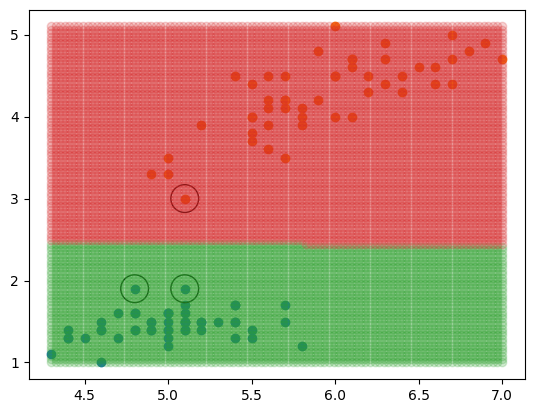

In [4]:
data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]

X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]

data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])
model = SVC(kernel = 'linear', C = 10000)
model.fit(X, y)

print(model.support_vectors_)

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s = 400, facecolor = 'none', edgecolors='k')


x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)
X_p["species"] = y_p

X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]


plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)


In [5]:
# Убрать часть точке и убедиться, что на предсказание влияют только опорные вектора

[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


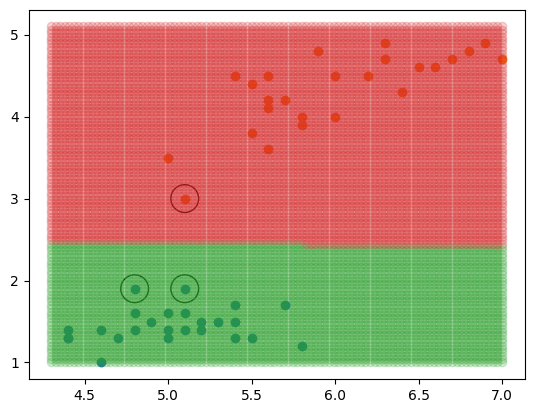

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC

iris = sns.load_dataset("iris")

data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "setosa") | (data["species"] == "versicolor")]
X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]
data_df_setosa = data_df[data_df["species"] == "setosa"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]

for i in range(1, 50, 2):
    data_df_setosa = data_df_setosa.drop(i, axis=0)
for i in range(51, 100, 2):
    data_df_versicolor = data_df_versicolor.drop(i, axis=0)

plt.scatter(data_df_setosa["sepal_length"], data_df_setosa["petal_length"])
plt.scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

model = SVC(kernel="linear", C=10000)
model.fit(X, y)

print(model.support_vectors_)
plt.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=400,
    facecolor="none",
    edgecolors="black",
)

x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)
X1_p, X2_p = np.meshgrid(x1_p, x2_p)
X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
)
y_p = model.predict(X_p)
X_p["species"] = y_p
X_p_setosa = X_p[X_p["species"] == "setosa"]
X_p_versicolor = X_p[X_p["species"] == "versicolor"]
plt.scatter(X_p_setosa["sepal_length"], X_p_setosa["petal_length"], alpha=0.2)
plt.scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.2)


plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

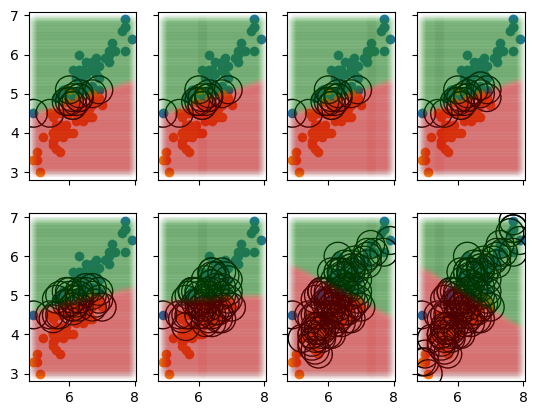

In [6]:
# Если данные перкрываются, то идеальной модели нет, существует гиперпараметр, который опрделяет размытие отступа


data = iris[["sepal_length", "petal_length", "species"]]
data_df = data[(data["species"] == "virginica") | (data["species"] == "versicolor")]

X = data_df[["sepal_length", "petal_length"]]
y = data_df[["species"]]

data_df_virginica = data_df[data_df["species"] == "virginica"]
data_df_versicolor = data_df[data_df["species"] == "versicolor"]


c_value = [[10000, 1000, 100, 10],
           [1, 0.1, 0.01, 0.001]]

fig, ax = plt.subplots(2,4, sharex = 'col', sharey='row')



for i in range(2):
    for j in range(4):
        ax[i,j].scatter(data_df_virginica["sepal_length"], data_df_virginica["petal_length"])
        ax[i,j].scatter(data_df_versicolor["sepal_length"], data_df_versicolor["petal_length"])

        model = SVC(kernel = 'linear', C = c_value[i][j])
        model.fit(X, y)
        # print(model.support_vectors_)

        ax[i,j].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s = 400, facecolor = 'none', edgecolors='k')


        x1_p = np.linspace(min(data_df["sepal_length"]), max(data_df["sepal_length"]), 100)
        x2_p = np.linspace(min(data_df["petal_length"]), max(data_df["petal_length"]), 100)

        X1_p, X2_p = np.meshgrid(x1_p, x2_p)
        X_p = pd.DataFrame(
            np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=["sepal_length", "petal_length"]
        )


        y_p = model.predict(X_p)
        X_p["species"] = y_p

        X_p_virginica = X_p[X_p["species"] == "virginica"]
        X_p_versicolor = X_p[X_p["species"] == "versicolor"]


        ax[i,j].scatter(X_p_virginica["sepal_length"], X_p_virginica["petal_length"], alpha=0.01)
        ax[i,j].scatter(X_p_versicolor["sepal_length"], X_p_versicolor["petal_length"], alpha=0.01)


In [7]:
# Достоинства
# 1. Зависимотсьь от небольшого числа опорных векторов - компактность модели
# 2. После обученияпредсказания проходят очень быстро
# 3. на работу влияют только точки, находящиеся возле отступов, поэтому методы подходят для многомерных данных


#Недостатки
# При большом количестве обучающих обрацов, требуются большие вычислительные затраты
# Большая зависимость от размытости С
# У результатов отсутствует вероятностная интепретация